In [1]:
from keras.datasets import cifar10
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
# Load data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
# Look at the data types of the variables
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [4]:
# Get the shapes of the arrays
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

x_train: (50000, 32, 32, 3)
y_train: (50000, 1)
x_test: (10000, 32, 32, 3)
y_test: (10000, 1)


In [5]:
# Take a look at the first image as an array
index = 0
x_train[index]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

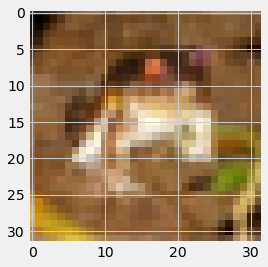

In [6]:
# Show the image as a picture
img = plt.imshow(x_train[index])

In [7]:
# Get image label
print('The image label is:', y_train[index])

The image label is: [6]


In [8]:
# Get the image classification
classification = ['airplane', 'automobile', 'bird', 'cat',
                  'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print('The image class is:', classification[y_train[index][0]])

The image class is: frog


In [9]:
# Convert the labels into a set of 10 numbers to input into the neural network
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [10]:
# Print the new labels
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [11]:
# Print the new label of the image/picture above
print('The one hot label is:', y_train_one_hot[index])

The one hot label is: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [12]:
# Normalize the pixels to be values between 0 and 1
x_train = x_train / 100
x_test = x_test / 100


In [13]:
# Create the model's architecture
model = Sequential()

# Add the first layer
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(32, 32, 3)))

# Add a pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add another convolution layer
model.add(Conv2D(32, (5, 5), activation='relu'))

# Add another pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add a flattetning layer
model.add(Flatten())

# Add a layer with 1000 neurons
model.add(Dense(1000, activation='relu'))

# Add a dropout layer
model.add(Dropout(0.5))

# Add a layer with 500 neurons
model.add(Dense(500, activation='relu'))

# Add a dropout layer
model.add(Dropout(0.5))

# Add a layer with 250 neurons
model.add(Dense(250, activation='relu'))

# Add a layer with 10 neurons
model.add(Dense(10, activation='softmax'))

In [14]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

In [15]:
# Train the model
hist = model.fit(x_train, y_train_one_hot, batch_size=256,
                 epochs=10, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 50s 304ms/step - loss: 1.9840 - accuracy: 0.2528 - val_loss: 1.4783 - val_accuracy: 0.4545
Epoch 2/10
157/157 [==============================] - 52s 332ms/step - loss: 1.4376 - accuracy: 0.4707 - val_loss: 1.3625 - val_accuracy: 0.5200
Epoch 3/10
157/157 [==============================] - 48s 306ms/step - loss: 1.2676 - accuracy: 0.5476 - val_loss: 1.1383 - val_accuracy: 0.5913
Epoch 4/10
157/157 [==============================] - 49s 315ms/step - loss: 1.1478 - accuracy: 0.5894 - val_loss: 1.1654 - val_accuracy: 0.5845
Epoch 5/10
157/157 [==============================] - 48s 308ms/step - loss: 1.0889 - accuracy: 0.6131 - val_loss: 1.0833 - val_accuracy: 0.6197
Epoch 6/10
157/157 [==============================] - 49s 314ms/step - loss: 0.9949 - accuracy: 0.6495 - val_loss: 1.0163 - val_accuracy: 0.6448
Epoch 7/10
157/157 [==============================] - 48s 305ms/step - loss: 0.9204 - accuracy: 0.6760 - val_loss: 0.9987 - val_ac

In [16]:
# Evaluate the model using the test data set
model.evaluate(x_test, y_test_one_hot)[1]

313/313 [==============================] - 5s 15ms/step - loss: 0.9583 - accuracy: 0.6727


0.6726999878883362

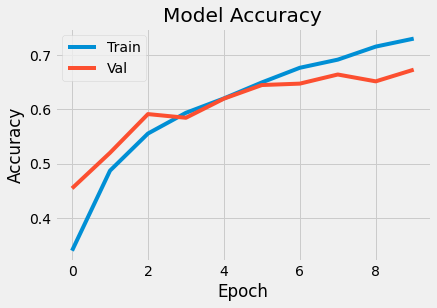

In [17]:
# Visualize the model's accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

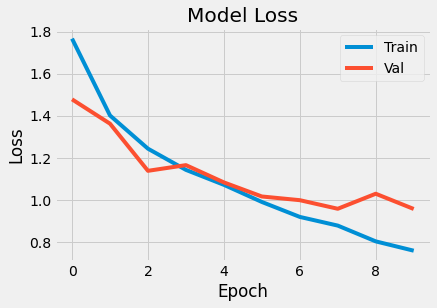

In [18]:
# Visualize the model's loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

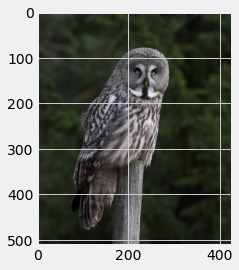

In [20]:
# Show the image
new_image = plt.imread('../test_images/lappuggla.jpg')
img = plt.imshow(new_image)

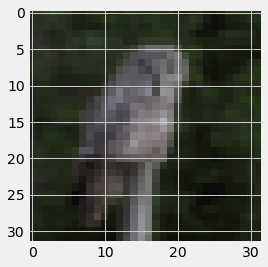

In [21]:
# Resize the image
from skimage.transform import resize
resized_image = resize(new_image, (32,32,3))
img = plt.imshow(resized_image)

In [22]:
# Get the model's predictions
predictions = model.predict(np.array([resized_image]))
# Show the predictions
predictions

array([[0.00233873, 0.00078653, 0.3645121 , 0.16046916, 0.14268804,
        0.05587748, 0.26353827, 0.00750859, 0.00119135, 0.00108974]],
      dtype=float32)

In [23]:
# Sort the predicions from least to greatest
list_index = [0,1,2,3,4,5,6,7,8,9]
x = predictions

for i in range(10):
    for j in range(10):
        if x[0][list_index[i]] > x[0][list_index[j]]:
            temp = list_index[i]
            list_index[i] = list_index[j]
            list_index[j] = temp

# Show the sorted labels in order
print(list_index)


[2, 6, 3, 4, 5, 7, 0, 8, 9, 1]


In [24]:
# Print the first 5 predictions
for i in range(5):
    print(str(i+1) + '. ' + classification[list_index[i]] + ' (' + str(round(predictions[0][list_index[i]] * 100, 2)) + '%)')

1. bird (36.45%)
2. frog (26.35%)
3. cat (16.05%)
4. deer (14.27%)
5. dog (5.59%)
